# Milestone 1

# 1. Introduction

Nama: Arnaz Tejakusuma

Batch: 012

URL: https://arnaz-frontend-p2m1.herokuapp.com

# 2. Dataset Description

Dataset yang digunakan dalam project ini merupakan data customer sebuah perusahaan telekomunikasi. Dataset ini terdiri dari kolom-kolom yang memuat berbagai informasi customer mulai dari data diri, jenis layanan yang disubscribe, sampai pada total tagihan bulanan. 

Informasi-informasi ini dapat digunakan untuk memprediksi apakah seorang customer akan bertahan atau berhenti menggunakan jasa perusahaan telekomunikasi tersebut dalam kurun waktu tertentu. Laporan mengenai customer churn merupakan laporan yang penting karena dapat memberikan gambaran mengenai tingkat kesuksesan sebuah perusahaan dalam mempertahankan customer.

Dataset ini diperoleh dari Kaggle dan diposting oleh akun BLASTCHAR dengan link sebagai berikut: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# 3. Objectives

Project ini merupakan Milestone 1 di Fase 2 Program FTDS. Project ini dibuat dengan tujuan mengevaluasi pemahaman mengenai materi Deep Learning, khususnya Artificial Neural Network (ANN). Melalui project ini, peserta diharapkan dapat:

- Memahami konsep ANN
- Mempersiapkan data untuk digunakan dalam model ANN
- Mengimplementasikan ANN dengan data yang diberikan
- Menganalisis dan menjelaskan layer yang dibuat

# 4. Import Libraries

Dalam project ini, libraries yang digunakan adalah Pandas, Numpy, Matplotlib, Seaborn, Tensorflow, Keras, dan Pickle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

# 5. Data Loading

In [2]:
# Loading dataset
df_ori = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Membuat copy dari dataset agar dataset asli tetap utuh dan dapat dicek sewaktu-waktu
df_kopi = df_ori.copy()

# 6. Menampilkan Dataset

In [4]:
# Mengganti display setting dari dataset agar tidak ada kolom yang terpotong
pd.set_option('display.max.columns', None)

In [5]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris awal dari dataset
df_kopi.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris akhir dari dataset
df_kopi.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris secara acak dari dataset
df_kopi.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2231,2482-CZGBB,Male,0,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.00,740,Yes
4988,1439-LCGVL,Female,0,Yes,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.20,459.6,No
4684,6305-YLBMM,Male,0,No,No,69,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.05,7262,Yes
4371,3372-CDXFJ,Male,0,Yes,Yes,13,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.50,343.6,No
5975,1522-VVDMG,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.8,Yes


# 7. Preview Dataset

In [8]:
# Memastikan total jumlah baris dan kolom dari dataset
df_kopi.shape

(7043, 21)

Dataset ini terdiri dari:

- 7043 baris
- 21 kolom

In [9]:
# Memeriksa tipe data
df_kopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Memastikan kolom yang memiliki entry null
df_kopi.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Berdasarkan pengamatan, dataset ini terdiri dari:

- 18 kolom dengan tipe data object, 2 kolom dengan tipe data integer, dan 1 kolom dengan tipe data float.

- Tidak terdapat entry dengan value null dalam dataset ini.

- Ada hal yang menurut saya ganjil, dimana kolom "TotalCharges" yang seharusnya bertipe float malah dimasukkan dalam kategori object.

In [11]:
df_kopi.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
df_kopi.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Bila diamati secara sekilas, tidak terdapat value anomali baik dalam kolom numerikal dan kategorikal.

# 8. Modifikasi Kolom

## 8.1 Mendrop Kolom yang Tidak Diperlukan

In [13]:
# Mendrop kolom "customerID"
df_kopi.drop(['customerID'], axis = 1, inplace = True)

Saya memutuskan untuk mendrop kolom "customerID" karena berdasarkan personal judgement, saya meyakini bahwa kolom "customerID" sama sekali tidak memiliki pada prediksi customer churn. Kolom "customerID" hanya berlaku sebagai penanda bahwa seseorang merupakan subscriber dari sebuah layanan. Selain itu total unique number dalam "customerID" sangat banyak, hal ini akan membuat proses train dan test model menjadi lama dan berat. Suatu hal yang menurut saya dapat dihindari dan memperingan ongkos komputasi, mengingat kolom ini tidak signifikan.

## 8.2 Mengganti Tipe Data yang Kurang Sesuai

In [14]:
# Memeriksa unique value count dalam kolom "TotalCharges"
df_kopi['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Sebelum memeriksa value count dan unique value dalam kolom "TotalCharges" tadinya saya berniat langsung mengganti tipe data kolom ini, karena pada pengecekan awal tidak terdapat entry dengan value null. 

Namun ketika syntax untuk mengganti tipe data di-run, ternyata terjadi error. Berarti ada value anomali yang ada dalam kolom ini. Ketika dilakukan pengecekan, ternyata memang tidak ada entry dengan value null, namun ada 11 entry yang diganti dengan space kosong.

In [ ]:
# Terdapat 11 entry yang berisi space kosong
df_kopi[
    (df_kopi['TotalCharges'] == ' ')
]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# Mendrop entry yang berisi space kosong, karena jumlahnya hanya 11 maka tidak akan berpengaruh signifikan
df_kopi.drop(df_kopi.index[df_kopi['TotalCharges'] == ' '], inplace = True)

In [16]:
# Sudah tidak terdapat entry yang berisi space kosong
df_kopi[
    (df_kopi['TotalCharges'] == ' ')
]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
# Mengganti tipe data "TotalCharges" dari object menjadi float
df_kopi['TotalCharges'] = df_kopi['TotalCharges'].astype(float)

print('type:', df_kopi['TotalCharges'].dtype)

type: float64


Entry dengan value berisi space kosong telah didrop.

Kemudian syntax untuk mengganti tipe kolom "TotalCharges" di-run ulang dan kali ini sudah berhasil mengganti tipe data menjadi yang sesuai yaitu float.

# 9. Exploratory Data Analysis (EDA)

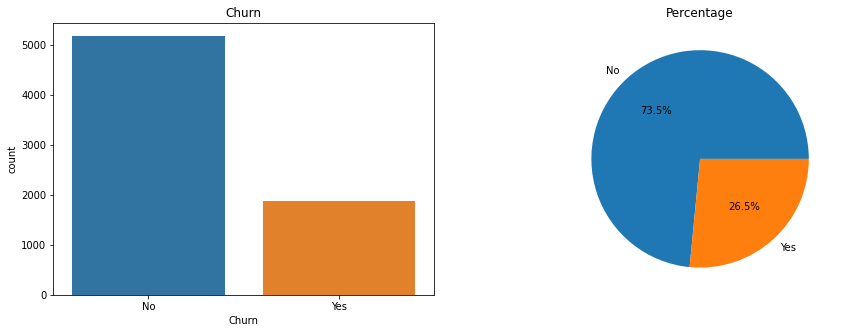

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot (x = 'Churn', data = df_ori)
plt.title('Churn')

plt.subplot(1,2,2)
plt.pie(df_ori.Churn.value_counts(), labels = df_ori.Churn.value_counts().index, autopct='%1.1f%%')
plt.title('Percentage')
plt.show()

Berdasarkan bar chart dan pie chart diatas, jumlah customer yang churn atau memutuskan untuk tidak melanjutkan langganan mencapai hampir 2000 orang atau sekitar 26.5% dari total customer. 

Seperti yang kita ketahui, kemampuan sebuah perusahaan untuk mempertahankan customer merupakan hal yang krusial. Karena hal ini dapat memengaruhi growth rate perusahaan tersebut. 

Dalam studi kasus project ini, menurut saya churn rate dari perusahaan ini sudah cukup tinggi. Sehingga perlu diselidiki lebih lanjut lagi apa yang menjadi penyebab tingginya churn rate di perusahaan ini. 

Secara umum, kebanyakan customer memutuskan untuk berhenti menggunakan sebuah layanan karena merasa tidak dipedulikan oleh perusahaan. Namun tentunya ada faktor-faktor lain juga yang dapat memengaruhi churn rate dan inilah yang akan berusaha diselidiki dalam EDA ini.

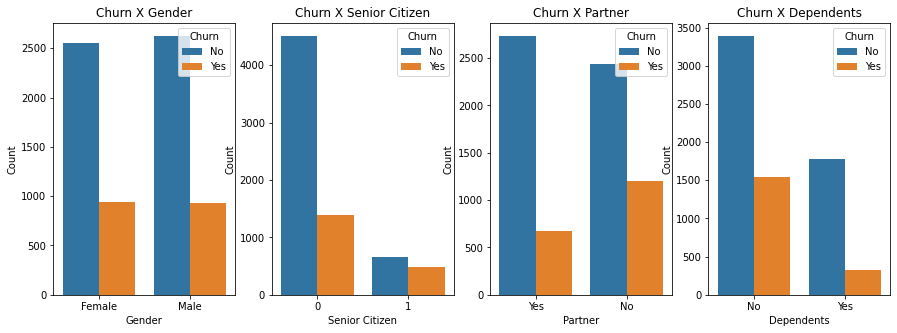

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
sns.countplot(x = 'gender', data = df_ori, hue = 'Churn')
plt.title('Churn X Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1,4,2)
sns.countplot(x = 'SeniorCitizen', data = df_ori, hue = 'Churn')
plt.title('Churn X Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

plt.subplot(1,4,3)
sns.countplot(x = 'Partner', data = df_ori, hue = 'Churn')
plt.title('Churn X Partner')
plt.xlabel('Partner')
plt.ylabel('Count')

plt.subplot(1,4,4)
sns.countplot(x = 'Dependents', data = df_ori, hue = 'Churn')
plt.title('Churn X Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

plt.show()

Pada EDA ini akan diselidiki apakah tingginya churn rate dipengaruhi oleh profile customer seperti jenis kelamin, usia, dan apakah customer masih lajang atau sudah berkeluarga dan memiliki tanggungan. 

Dari bar chart yang sudah diplot diatas, dapat diketahui bahwa:

- Jenis kelamin customer tidak memiliki pengaruh terhadap kemungkinan customer untuk berhenti berlayanan atau tetap menggunakan layanan.

- Berdasarkan usia, memang kebanyakan customer berusia masih muda. Namun hal ini merupakan hal yang wajar karena secara umum orang berusia muda yang masih aktif bekerja dan beraktifitas tentunya akan lebih sering juga menggunakan layanan telekomunikasi ketimbang orang tua yang sudah pensiun dan tidak aktif bekerja. (interpretasi kolom Senior Citizen: 0 (No), 1(Yes)).

- Selain itu juga sepertinya tidak terdapat korelasi antara customer yang sudah berkeluarga dan memiliki tanggungan terhadap keputusan mereka untuk melanjutkan atau berhenti berlangganan.

Dengan demikian dapat disimpulkan bahwa profile customer tidak memiliki pengaruh terhadap keputusan mereka untuk berhenti atau meneruskan langganan. 


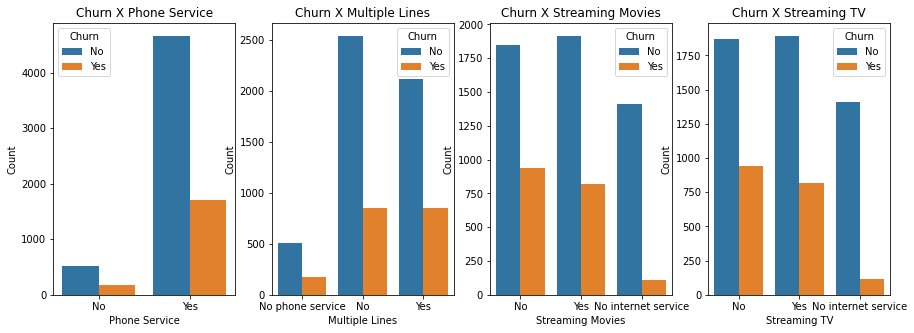

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
sns.countplot(x = 'PhoneService', data = df_ori, hue = 'Churn')
plt.title('Churn X Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')

plt.subplot(1,4,2)
sns.countplot(x = 'MultipleLines', data = df_ori, hue = 'Churn')
plt.title('Churn X Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')

plt.subplot(1,4,3)
sns.countplot(x = 'StreamingMovies', data = df_ori, hue = 'Churn')
plt.title('Churn X Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')

plt.subplot(1,4,4)
sns.countplot(x = 'StreamingTV', data = df_ori, hue = 'Churn')
plt.title('Churn X Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')

plt.show()

Pada EDA ini akan diselidiki apakah tingginya churn rate dipengaruhi oleh servis atau layanan lain yang juga disubscribe oleh customer seperti layanan telepon atau layanan streaming. Dari bar chart yang sudah diplot diatas, terlihat bahwa servis atau layanan lain yang disubscribe oleh customer tidak berpengaruh pada keputusan mereka untuk berhenti atau melanjutkan layanan. Sehingga dapat diduga, tingginya churn rate diakibatkan oleh ketidakpuasan customer terhadap layanan dari perusahaan.

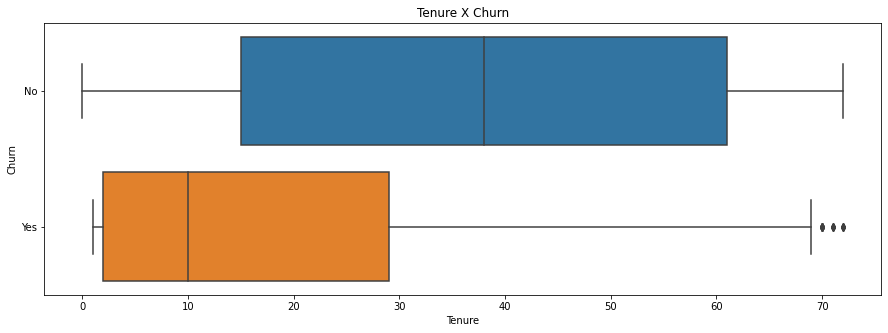

In [21]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'tenure', y = 'Churn', data = df_ori)
plt.title('Tenure X Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

Berdasarkan EDA-EDA sebelumnya, saya menyimpulkan bahwa churn rate yang tinggi ini diakibatkan oleh ketidakpuasan pelanggan terhadap layanan perusahaan. Untuk itu penting juga untuk melihat tipe pelanggan seperti apa yang cenderung bertahan dan tipe pelanggan seperti apa yang cenderung untuk berhenti berlangganan.

Untuk memeriksa hal ini, kita dapat menggunakan kolom Tenure. Dalam konteks project ini, Tenure merupakan lama seorang customer berlangganan suatu layanan atau jasa. Berdasarkan box plot diatas, terlihat bahwa customer retention perusahaan, terutama untuk customer yang cenderung baru cukup rendah. Disini terlihat bahwa banyak customer yang memutuskan untuk berhenti berlangganan ketika baru memasuki bulan ke-10. Darisini dapat diduga bahwa customer merasa tidak puas terhadap layanan yang diberikan perusahaan. Penyebabnya harus dicari lebih lanjut oleh tim customer service.

Sedangkan customer yang sudah lama condong untuk meneruskan layanan. Ada kemungkinan bahwa mereka cukup merasa puas dengan layanan yang diberikan sedangkan kemungkinan lainnnya adalah mereka merasa malas untuk menghentikan layanan karena prosedur untuk berhenti berlangganan yang sering kali rumit sehingga akhirnya memutuskan untuk bertahan.

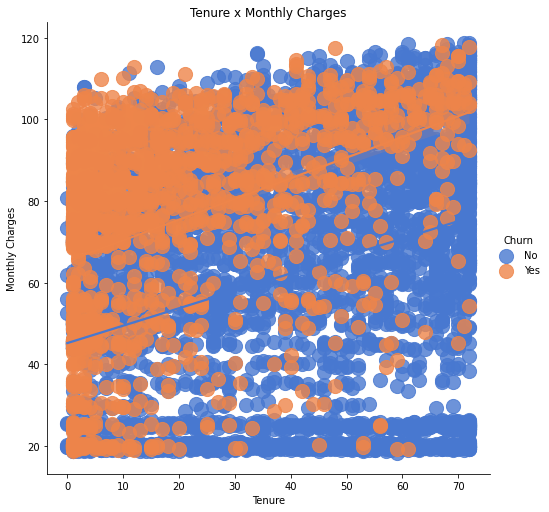

In [25]:
tenure_vs_charges = sns.lmplot(height = 7, data = df_ori, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'muted')
tenure_vs_charges.set(xlabel = 'Tenure',
     ylabel = 'Monthly Charges')
tenure_vs_charges = plt.title('Tenure x Monthly Charges')

# Sumber: syntax ini diperoleh dari postingan Kaggle yang dibuat oleh Luis Fernando Torres.
# Link: https://www.kaggle.com/code/lusfernandotorres/exploratory-data-analysis-and-churn-prediction

Salah satu hal yang cukup menimbulkan tanda tanya adalah lemahnya kemampuan perusahaan dalam mempertahankan customer baru. Pada EDA sebelumnya, saya menduga bahwa customer memutuskan untuk berhenti karena tidak merasa puas dengan layanan perusahaan. Namun dari scatter plot diatas, sepertinya faktor harga juga merupakan faktor yang dapat memengaruhi. Terlihat bahwa customer baru banyak yang tagihannya cukup mahal dan pada segmen ini juga banyak customer memutuskan untuk berhenti berlangganan.

Darisini, tim customer service harus mencari tahu apakah customer baru sudah mendapatkan penjelasan atau briefing yang baik ketika mereka melakukan sign-up untuk sebuah layanan. Jangan-jangan karena minim informasi, customer tanpa sengaja memilih layanan yang lebih mahal dan kemudian memutuskan berhenti karena merasa tagihannya terlalu memberatkan.

Text(0, 0.5, 'Count')

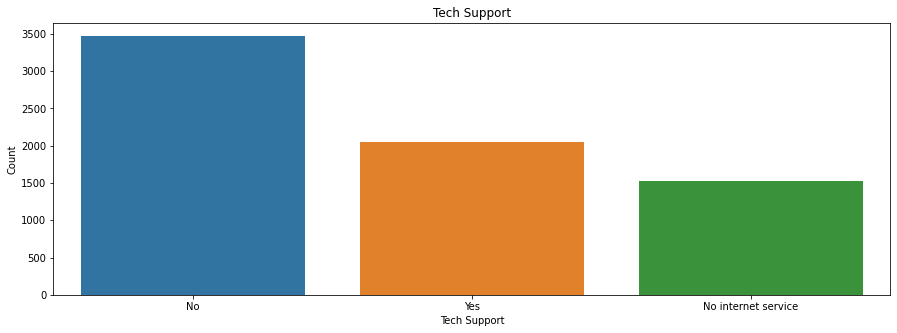

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'TechSupport', data = df_ori)
plt.title('Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')

Hal lain yang harus diperhatikan perusahaan adalah banyaknya customer yang tidak mendapatkan tech support. Salah satu penyebab utama dari tingginya churn rate adalah customer yang tidak merasa diperhatikan oleh perusahaan. Terlebih bagi perusahaan telekomunikasi, tech support merupakan layanan yang sangat esensial yang harus selalu tersedia bagi customer. Tingginya jumlah customer yang tidak mendapatkan tech support harus menjadi perhatian bagi perusahaan dan tentunya harus ada perbaikan layanan yang harus segera dilakukan.

# 10. Data Preprocessing

## 10.1 Handling Outliers

Untuk project ini tidak dilakukan proses handling outliers. Tujuannya untuk menjaga kemurnian dataset, sehingga hasil prediksi yang dikeluarkan juga akan lebih tepat dan sesuai dengan keadaan di lapangan.

## 10.2 Memastikan Dataset Sudah Tidak Memiliki Missing Value

In [23]:
# Kembali memastikan dataset sudah terbebas dari missing value sebelum dilakukan splitting
df_kopi.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 10.3 Mengambil Sebagian Data untuk Dijadikan Inference

In [26]:
# Membuat dataframe inference, mengambil 10 entry yang nantinya digunakan untuk menguji model yang dibuat
df_inf = df_kopi.sample(10, random_state=17)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
184,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
3860,Male,0,No,Yes,19,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.10,No
2279,Male,1,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.90,No
4358,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,No
5439,Male,1,No,No,32,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,Yes
2807,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No
3642,Female,1,No,No,30,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.10,3121.10,No
6527,Male,0,Yes,Yes,6,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,Yes
6800,Female,0,Yes,No,14,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,Yes
6747,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No


In [30]:
# Mendrop data yang telah dipilih menjadi inference dari dataset
df_train = df_kopi.drop(df_inf.index)
df_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
# Mereset index agar tidak terjadi kesalahan yang disebabkan oleh index yang belum direset
df_train.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## 10.4 Membagi Dataset Menjadi X (feature), y (target), dan Validation Set

In [32]:
# Membagi antara X(feature) dengan y(target)
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7018,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7019,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7020,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [34]:
# Membagi antara train dan test set, train set presentasenya adalah 80% dan test set presentasenya adalah 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train size:' , X_train.shape)
print('Test size:', X_test.shape)

Train size: (5617, 19)
Test size: (1405, 19)


In [35]:
# Memisahkan sebagian data untuk validation set
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=17)

# 11. Feature Selection

Pada bagian awal notebook ini, saya telah mendrop kolom "customerID" yang saya anggap tidak berhubungan sama sekali dengan prediksi customer churn. Dengan demikian sisa kolom yang berjumlah 19 kolom seluruhnya akan dijadikan feature untuk memprediksi customer churn.

# 12. Membuat Pipeline untuk Preprocessing

Untuk project kali ini, normalisasi kolom numerikal akan dilakukan dengan StandardScaler, sedangkan normalisasi kolom kategorikal akan dilakukan dengan OneHotEncoder.




In [36]:
# Membuat pipeline untuk scaling
pipe_num = Pipeline([('scaler', StandardScaler())])

# Membuat pipeline untuk encoding
pipe_cat = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))])

# Membuat pipeline preprocessing
pipe_prc = ColumnTransformer([
    ('num',pipe_num, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',pipe_cat, X_train.select_dtypes(include=['object']).columns)
])

## 12.1 Melakukan Proses Fit dan Transform untuk Setiap Set

In [38]:
# Pada train set dilakukan proses fit transform
X_train_SE = pipe_prc.fit_transform(X_train_2)

# Pada test set hanya dilakukan proses transform
X_test_transformed = pipe_prc.transform(X_test)

# Pada validation set hanya dilakukan proses transform
X_val_transformed = pipe_prc.transform(X_val)

In [39]:
# Mengganti label target menjadi numerikal untuk mempermudah proses komputasi
y_train_2 = y_train_2.map({'Yes': 1, 'No': 0})
y_val = y_val.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

# 13. Input Pipeline

Membuat pipeline untuk menginput data ke tensorflow. Semua dataset baik train, test, dan valiation dibuatkan pipeline untuk mempermudah pengerjaan project.

In [40]:
# Membuat pipleine untuk train set
pipe_train = tf.data.Dataset.from_tensor_slices((X_train_SE, y_train_2)).batch(32)

# Membuat pipeline untuk test set
pipe_test = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test)).batch(32)

# Membuat pipeline untuk validation set
pipe_val = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val)).batch(32)


# 14. Model Definition and Evaluation

Untuk project ini model yang akan dibuat adalah model Sequential API dan Functional API. Sedangkan proses evaluasinya akan dilakukan dengan classification report.

## 14.1.1. Model I (Sequential API)

In [41]:
# Mendefinisikan model
model_I = Sequential()

# Membuat hidden layer
model_I.add(Dense(16, activation = 'relu', input_shape = (X_train_SE.shape[1],)))

# membuat output layer
model_I.add(Dense(1, activation = 'sigmoid'))

# Compile model
model_I.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Dalam project ini, karena target yang akan diprediksi hanya berupa pilihan "yes" atau "no" maka loss function yang digunakan adalah binary crossentropy. Sedangkan activation function yang digunakan adalah sigmoid, yang biasanya memang dipasangkan dengan binary crossentropy. Model ini saya buat hanya dengan sebuah hidden layer.

In [42]:
# Model training
history_model_I = model_I.fit(pipe_train, epochs = 40, validation_data = (pipe_val))

Epoch 1/40
141/141 [==============================] - 6s 9ms/step - loss: 0.5255 - accuracy: 0.7298 - val_loss: 0.4522 - val_accuracy: 0.8007
Epoch 2/40
141/141 [==============================] - 1s 5ms/step - loss: 0.4296 - accuracy: 0.8010 - val_loss: 0.4354 - val_accuracy: 0.8087
Epoch 3/40
141/141 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8039 - val_loss: 0.4311 - val_accuracy: 0.8060
Epoch 4/40
141/141 [==============================] - 1s 7ms/step - loss: 0.4160 - accuracy: 0.8046 - val_loss: 0.4291 - val_accuracy: 0.8105
Epoch 5/40
141/141 [==============================] - 1s 5ms/step - loss: 0.4138 - accuracy: 0.8073 - val_loss: 0.4273 - val_accuracy: 0.8105
Epoch 6/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8061 - val_loss: 0.4262 - val_accuracy: 0.8105
Epoch 7/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8068 - val_loss: 0.4254 - val_accuracy: 0.8087
Epoch 

Karena dataset dalam project ini tidak memiliki banyak data, epochs hanya saya set di angka 40. Hasilnya sudah cukup baik dimana accuracynya mencapai 0.81.

In [43]:
model_I.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                736       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


## 14.1.2. Model I (Sequential API) Evaluation

In [44]:
# Membuat dataframe baru yang berisi history dari model Sequential API
model_I_eval = pd.DataFrame(history_model_I.history)

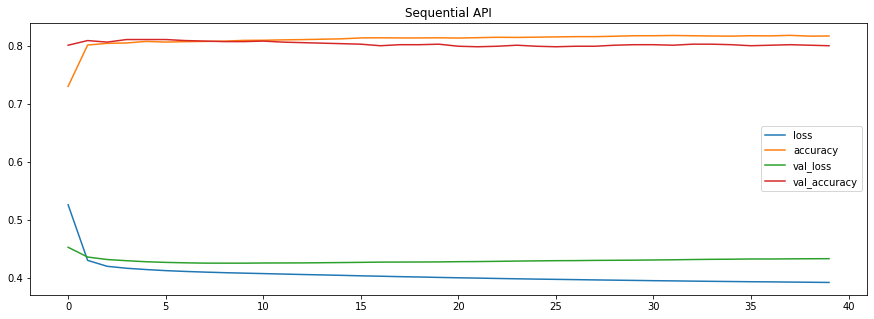

In [45]:
# Visualization
model_I_eval.plot(figsize = (15,5))
plt.title('Sequential API')
plt.show()

Interpretasi dari grafik visualisasi:

- Ketika baru mencapai epochs ke-2, performa model sudah mulai stabil, dimana performanya berkisar antara 0.80-0.81.
- Begitu pula dengan loss yang mulai konvergen pada epochs ke-2.

In [46]:
# Classification report train set
model_I_pred_train = model_I.predict(X_train_SE)
model_I_pred_train = np.where(model_I_pred_train > 0.5, 1, 0)
print(classification_report(y_train_2, model_I_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3301
           1       0.66      0.62      0.64      1192

    accuracy                           0.82      4493
   macro avg       0.76      0.75      0.76      4493
weighted avg       0.81      0.82      0.81      4493



In [47]:
# Classification report test set
model_I_pred_test = model_I.predict(X_test_transformed)
model_I_pred_test = np.where(model_I_pred_test > 0.5, 1, 0)
print(classification_report(y_test, model_I_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1023
           1       0.59      0.58      0.58       382

    accuracy                           0.78      1405
   macro avg       0.72      0.71      0.72      1405
weighted avg       0.78      0.78      0.78      1405



Ada sedikit perbedaan performa model ketika diuji dengan train set (0.81) dan test set (0.78). Namun karena perbedaan belum mencapai 5%, menurut saya model ini masih good fit. Selain itu model cenderung dapat memprediksi kategori 0 dengan lebih baik daripada kategori 1. Namun hal ini mungkin disebabkan karena dataset yang tidak balance.

## 14.2.1. Model II (Functional API)

In [48]:
# Membuat variabel untuk input data
model_II_input = Input(shape=(X_train_SE.shape[1],))

# Membuat variabel untuk hidden layer
model_II_hidden = Dense(16, activation = 'relu')(model_II_input)

# Membuat variabel untuk output
model_II_output = Dense(1, activation='sigmoid')(model_II_hidden)

# Mendefinisikan model
model_II = Model(inputs = model_II_input, outputs = model_II_output)

# Compile model
model_II.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Sama halnya dengan model sequential, loss function yang digunakan untuk model ini adalah binary crossentrophy karena target yang diprediksi hanya berupa kemungkinan "yes" atau "no" sedangkan untuk activation function yang digunakan juga sigmoid. Model ini saya buat dengan sebuah hidden layer.

In [49]:
# Model training
history_model_II = model_II.fit(pipe_train, epochs = 40, validation_data = (pipe_val))

Epoch 1/40
141/141 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.7432 - val_loss: 0.4416 - val_accuracy: 0.8016
Epoch 2/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8006 - val_loss: 0.4301 - val_accuracy: 0.8025
Epoch 3/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8017 - val_loss: 0.4274 - val_accuracy: 0.7998
Epoch 4/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8041 - val_loss: 0.4262 - val_accuracy: 0.8016
Epoch 5/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8061 - val_loss: 0.4253 - val_accuracy: 0.8034
Epoch 6/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8084 - val_loss: 0.4241 - val_accuracy: 0.8043
Epoch 7/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8086 - val_loss: 0.4231 - val_accuracy: 0.8034
Epoch 

Karena dataset dalam project ini tidak memiliki banyak data, epochs hanya saya set di angka 40. Hasilnya sudah cukup baik dimana accuracynya mencapai 0.81 berimbang dengan model sequential.

In [52]:
model_II.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                736       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


## 14.2.2. Model II (Functional API) Evaluation

In [50]:
# Membuat dataframe baru yang berisi history dari model Sequential API
model_II_eval = pd.DataFrame(history_model_II.history)

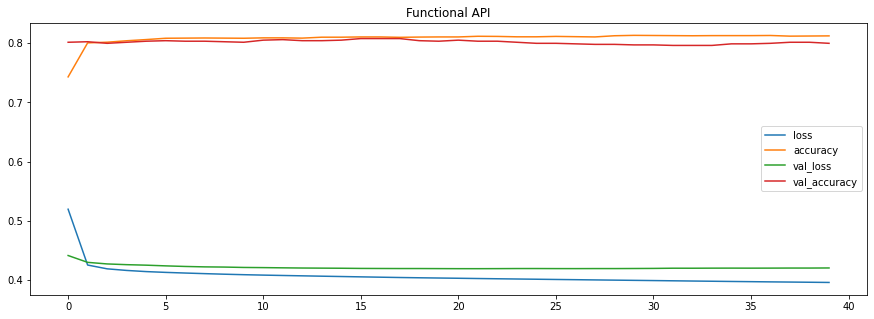

In [51]:
# Visualization
model_II_eval.plot(figsize = (15,5))
plt.title('Functional API')
plt.show()

Interpretasi dari grafik visualisasi:

- Sejak epochs ke-1, performa model sudah stabil, dimana performanya berkisar antara 0.80-0.81.
- Begitu pula dengan loss yang mulai konvergen sejak epochs ke-1, namun mulai menjauh lagi pada epochs ke-30.

In [53]:
# Classification report train set
model_II_pred_train = model_II.predict(X_train_SE)
model_II_pred_train = np.where(model_II_pred_train > 0.5, 1, 0)
print(classification_report(y_train_2, model_II_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3301
           1       0.66      0.62      0.64      1192

    accuracy                           0.81      4493
   macro avg       0.76      0.75      0.76      4493
weighted avg       0.81      0.81      0.81      4493



In [54]:
# Classification report test set
model_II_pred_test = model_II.predict(X_test_transformed)
model_II_pred_test = np.where(model_II_pred_test > 0.5, 1, 0)
print(classification_report(y_test, model_II_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1023
           1       0.62      0.58      0.60       382

    accuracy                           0.79      1405
   macro avg       0.73      0.72      0.73      1405
weighted avg       0.78      0.79      0.79      1405



Ada sedikit perbedaan performa model ketika diuji dengan train set (0.81) dan test set (0.78). Namun karena perbedaan belum mencapai 5%, menurut saya model ini masih good fit. Performa model ini berimbang dengan model sequential. Kemudian, sama halnya dengan model sequential, model ini juga cenderung lebih baik dalam memprediksi kategori 0 ketimbang kategori 1. Alasannya kemungkinan karena dataset ini tidak balance.

# 15. Model Improvement

Karena baik model functional dan sequential memiliki performa yang kurang lebih sama, maka saya bebas menentukan model mana yang akan saya pilih untuk dituning. Untuk project kali ini, saya memilih untuk melakukan improvement pada model sequential.

## 15.1.1. Parameter Tuning untuk Model Sequential

In [55]:
# Mendefinisikan model
model_I_improvement = Sequential()

# Membuat hidden layer
model_I_improvement.add(Dense(24, activation = 'relu', input_shape = (X_train_SE.shape[1],)))

# Menambah hidden layer
model_I_improvement.add(Dense(16, activation = 'relu', input_shape = (X_train_SE.shape[1],)))

# Menambah hidden layer
model_I_improvement.add(Dense(8, activation = 'relu', input_shape = (X_train_SE.shape[1],)))

# membuat output layer
model_I_improvement.add(Dense(1, activation = 'sigmoid'))

# Compile model
model_I_improvement.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Pada model sequential yang awal, saya hanya membuat sebuah hidden layer. Maka untuk menaikkan performa model, saya tambahkan dua hidden layer.

In [56]:
# Model training
history_model_I_improvement = model_I_improvement.fit(pipe_train, epochs = 40, validation_data = (pipe_val))

Epoch 1/40
141/141 [==============================] - 1s 4ms/step - loss: 0.5234 - accuracy: 0.7483 - val_loss: 0.4428 - val_accuracy: 0.8016
Epoch 2/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8008 - val_loss: 0.4298 - val_accuracy: 0.8105
Epoch 3/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8048 - val_loss: 0.4269 - val_accuracy: 0.8096
Epoch 4/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8066 - val_loss: 0.4257 - val_accuracy: 0.8087
Epoch 5/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8081 - val_loss: 0.4253 - val_accuracy: 0.8052
Epoch 6/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8090 - val_loss: 0.4252 - val_accuracy: 0.8052
Epoch 7/40
141/141 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8097 - val_loss: 0.4252 - val_accuracy: 0.8025
Epoch 

Dengan ditambahkan hidden layer, ternyata performa model meningkat sedikit. Model sequential yang awal accuracynya 0.81, sedangkan dengan ditambahkan hidden layer accuracynya meningkat jadi 0.82.

In [59]:
model_I_improvement.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                1104      
                                                                 
 dense_5 (Dense)             (None, 16)                400       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________


## 15.1.2. Model Improvement Evaluation

In [57]:
# Membuat dataframe baru yang berisi history dari model Sequential API
model_I_improvement_eval = pd.DataFrame(history_model_I_improvement.history)

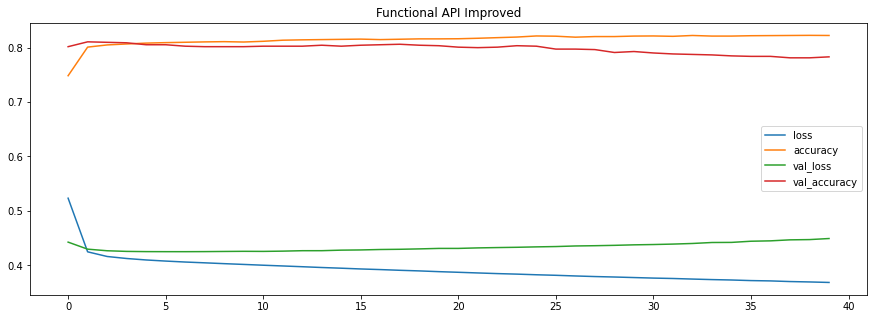

In [58]:
# Visualization
model_I_improvement_eval.plot(figsize = (15,5))
plt.title('Functional API Improved')
plt.show()

Interpretasi dari grafik visualisasi:

- Ketika mencapai epochs ke-2, performa model sudah mulai stabil, dimana performanya berkisar antara 0.80-0.82.
- Begitu pula dengan loss yang mulai konvergen pada epochs ke-2, namun kembali mengalami perbedaan yang cukup jauh mulai dari epochs ke-10.

In [60]:
# Classification report train set
model_I_improvement_pred_train = model_I_improvement.predict(X_train_SE)
model_I_improvement_pred_train = np.where(model_I_improvement_pred_train > 0.5, 1, 0)
print(classification_report(y_train_2, model_I_improvement_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3301
           1       0.67      0.68      0.67      1192

    accuracy                           0.83      4493
   macro avg       0.78      0.78      0.78      4493
weighted avg       0.83      0.83      0.83      4493



In [61]:
# Classification report test set
model_I_improvement_pred_test = model_I_improvement.predict(X_test_transformed)
model_I_improvement_pred_test = np.where(model_I_improvement_pred_test > 0.5, 1, 0)
print(classification_report(y_test, model_I_improvement_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1023
           1       0.60      0.61      0.60       382

    accuracy                           0.78      1405
   macro avg       0.73      0.73      0.73      1405
weighted avg       0.78      0.78      0.78      1405



Model sequential yang sudah ditambahkan hidden layer ini memang accuracynya paling tinggi ketika diuji dengan data train. Namun ketika diuji dengan data test, ternyata mengalami overfitting. 

Dengan demikian model ini tidak akan saya uji dengan data inference karena performanya tidak stabil. Untuk uji inference akan saya gunakan model sequential versi yang pertama.

# 16. Data Inference

In [62]:
# Cek data inference
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
1,Male,0,No,Yes,19,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.10,No
2,Male,1,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.90,No
3,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,No
4,Male,1,No,No,32,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,Yes
5,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No
6,Female,1,No,No,30,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.10,3121.10,No
7,Male,0,Yes,Yes,6,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,Yes
8,Female,0,Yes,No,14,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,Yes
9,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No


In [63]:
# Proses transform data inference
df_inf_transformed = pipe_prc.transform(df_inf)

In [64]:
# Predict
pred_inf = model_I.predict(df_inf_transformed)

# Mengkonversi hasil prediksi agar menjadi tipe data yang sama dengan target
pred_inf = np.where(pred_inf > 0.5, 'Yes', 'No')

In [65]:
# Hasil prediksi
pred_inf

array([['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No']], dtype='<U3')

In [66]:
# Membuat dataset baru yang berisi hasil prediksi
df_pred_inf = pd.DataFrame(pred_inf, columns = ['Prediction'])

In [67]:
# Concat dataset inference dengan dataset hasil prediksi
df_inf_final = pd.concat([df_inf, df_pred_inf], axis = 1)
df_inf_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes,Yes
1,Male,0,No,Yes,19,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.10,No,No
2,Male,1,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.90,No,No
3,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,No,No
4,Male,1,No,No,32,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,Yes,Yes
5,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No,No
6,Female,1,No,No,30,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.10,3121.10,No,Yes
7,Male,0,Yes,Yes,6,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,Yes,No
8,Female,0,Yes,No,14,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,Yes,No
9,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No,No


Secara umum, model sudah dapat bekerja dengan baik dalam memprediksi kemungkinan customer untuk bertahan atau berhenti menggunakan layanan. Modelnya memang masih belum sempurna dan tentunya masih terus dapat dilakukan improvement.

# 17. Conclusion

## Dataset Secara Umum

Ada beberapa hal yang dapat disoroti dari hasil EDA dataset ini:

- Perusahaan mengalami churn rate yang cukup tinggi. Berdasarkan EDA, dapat disimpulkan bahwa churn rate yang tinggi ini tidak berhubungan dengan profile customer atau layanan-layanan lain yang disubscribe oleh customer, melainkan terjadi karena ketidakpuasan customer terhadap layanan perusahaan. 

- Performa perusahaan dalam mempertahankan customer baru masih harus ditingkatkan. Banyak customer baru yang memutuskan untuk berhenti menggunakan layanan ketika mencapai bulan ke-10. Hal ini kemungkinan berkaitan dengan tingginya tagihan bulanan yang harus dibayarkan oleh customer. Harus dicari tahu apakah ada kemungkinan customer tidak sengaja memilih layanan yang lebih mahal akibat minimnya informasi pada saat proses sign-up dan kemudian menghentikan layanan karena dirasa memberatkan. Selain itu dapat juga dilakukan promosi berupa potongan harga atau bonus lainnya bagi customer baru agar mereka tertarik dan merasa worth it untuk terus menggunakan layanan. 

- Tech support yang bagus merupakan ujung tombak dari perusahaan telekomunikasi. Dimana layanan ini seharusnya tersedia 24/7 bagi customer. Namun dari hasil EDA, terlihat cukup banyak customer yang tidak mendapatkan tech support. Hal ini tentunya harus menjadi perhatian bagi perusahaan dan tentunya harus dilakukan peningkatan layanan tech support. Perusahaan harus ingat bahwa penyebab utama dari churn rate yang tinggi adalah customer yang merasa tidak diperhatikan oleh perusahaan. Tidak menyediakan layanan tech support merupakan salah satu indikasi perusahaan yang kurang memperhatikan customer. 

## Model Analysis

- Dalam project ini model sequential dan model functional dibuat untuk memprediksi kemungkinan customer untuk berhenti menggunakan layanan atau tidak. Performa kedua model cukup berimbang.

- Proses model improvement dilakukan terhadap model sequential. Dalam proses improvement ini, ditambahkan hidden layer pada model ini. Namun ternyata setelah diuji dengan test set, ternyata model ini mengalami overfitting.

- Pada proses uji inference, model yang digunakan adalah model sequential versi pertama. Model ini performanya sudah cukup baik dalam memprediksi kemungkinan customer untuk churn atau tidak. 

- Model improvement tentunya tetap dapat dilakukan. Misalnya dengan menambah lagi hidden layer, menambah atau mengurangi jumlah neuron, atau bereksperimen dengan optimizer yang berbeda.

# 18. Save Model dan Pipeline Preprocessing

In [ ]:
# Syntax save model dan pipeline preprocessing dijadikan comment agar tidak mengenerate file baru setiap kali notebook dirun ulang
# model_I.save("churn")

# with open('pipe_prc.pkl', 'wb') as file:
#     pickle.dump(pipe_prc, file)